# This is Health Insurance prediction issue on classification method

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from os.path import abspath, dirname
import warnings
warnings.filterwarnings('ignore')

### Geting data file 

In [185]:
path ='F:\TMLC_Working_dirctory'
os.chdir(path)
os.getcwd()
 

'F:\\TMLC_Working_dirctory'

In [186]:
train = pd.read_csv("Health_insurance.csv")

In [187]:
## Top 5 records
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [188]:
## Sample 5 record 
train.sample(5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
27458,27459,C11,4404,Rented,Individual,60,60,No,X2,3,1.0,12,19680.0,0
37698,37699,C1,2841,Rented,Individual,47,47,No,X1,4,3.0,13,17940.0,0
18717,18718,C9,157,Rented,Individual,47,47,No,NaN,1,1.0,4,13020.0,0
20622,20623,C1,767,Owned,Individual,57,57,No,NaN,NaN,NaN,12,13442.0,0
35749,35750,C3,3343,Rented,Individual,31,31,No,X2,5,1.0,19,9814.0,1


In [189]:
train.shape

(50882, 14)

### This data set has 14 columns and 50882 records , Respose is 

In [190]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [191]:
train.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [192]:
#Numerical features
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [193]:
#Categorical features
train.describe(include = ['object'])

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1
freq,8973,27951,40536,42460,13010,4499


In [194]:
train.isnull().any()

ID                         False
City_Code                  False
Region_Code                False
Accomodation_Type          False
Reco_Insurance_Type        False
Upper_Age                  False
Lower_Age                  False
Is_Spouse                  False
Health Indicator            True
Holding_Policy_Duration     True
Holding_Policy_Type         True
Reco_Policy_Cat            False
Reco_Policy_Premium        False
Response                   False
dtype: bool

#####  There are lots  of NULL in health Indicator , Policy duration and policy type

In [195]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

#### Health Indicator

In [197]:
train['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [198]:
train['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

#### Most of the health indicator are X1 and X2  NULL values filled with X0

In [199]:
## There are 11691 null values in health indicator , create one class 'X0' which cover all null values 
train['Health Indicator'] = train['Health Indicator'].fillna('X0')


In [200]:
train['Health Indicator'].value_counts()

X1    13010
X0    11691
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [201]:
train['Holding_Policy_Duration'].unique()

array(['14+', nan, '1', '3', '5', '9', '14', '7', '2', '11', '10', '8',
       '6', '4', '13', '12'], dtype=object)

In [202]:
## Policy Duration iis oobject type  for the presence of 14+ 
## To convert the data type , assuming all 14+ policy duration is at least 15
train.Holding_Policy_Duration.replace(to_replace='14+', value='15', inplace = True)
### There are 20251 null values 
#Replacing null values with 0
train.Holding_Policy_Duration.fillna(0, inplace = True)

## Lastly  make the column integer
train['Holding_Policy_Duration'] = train.Holding_Policy_Duration.astype(int)


In [203]:
#### Holding Policy type has 20251  null values , which is matching with Holding policy duration , most probably those are 
#### proposed policy
train.loc[train['Holding_Policy_Duration'] == 0, 'Holding_Policy_Type'] = train.loc[train['Holding_Policy_Duration'] == 0, 'Holding_Policy_Type'].fillna('0')


In [204]:
#### Holding_Policy_Type should be categorical value 
#Converting the numerical values into 5 categorical values
train['Holding_Policy_Type'] = train.Holding_Policy_Type.astype(str)

In [205]:
### now no NULL valus persist
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [206]:
#Drop the ID column
train.drop('ID', axis = 1, inplace = True)

In [207]:
## Accomodation type 
train['Accomodation_Type'].unique()

array(['Rented', 'Owned'], dtype=object)

In [208]:
#### Accomodation Type has two distinct value, so converting to numeric value 

train['Accomodation_Type'].replace({'Owned':1, 'Rented':0}, inplace = True)

train['Accomodation_Type'] = train.Accomodation_Type.astype(int)

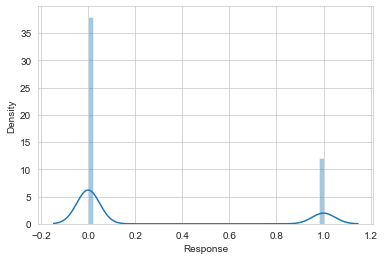

In [209]:
sns.distplot(train['Response']);

#### Traget variable is very skewed, most of the values are 0

In [210]:
#skew ness of data 
# determine index of continous attributes 
num_cols = train.dtypes[train.dtypes != 'object'].index 
skew_data =train[num_cols].skew().sort_values(ascending=False)
skew_data


Holding_Policy_Duration    1.285978
Response                   1.217936
Region_Code                0.798096
Reco_Policy_Premium        0.782463
Lower_Age                  0.330594
Upper_Age                  0.217370
Accomodation_Type         -0.198293
Reco_Policy_Cat           -0.928224
dtype: float64

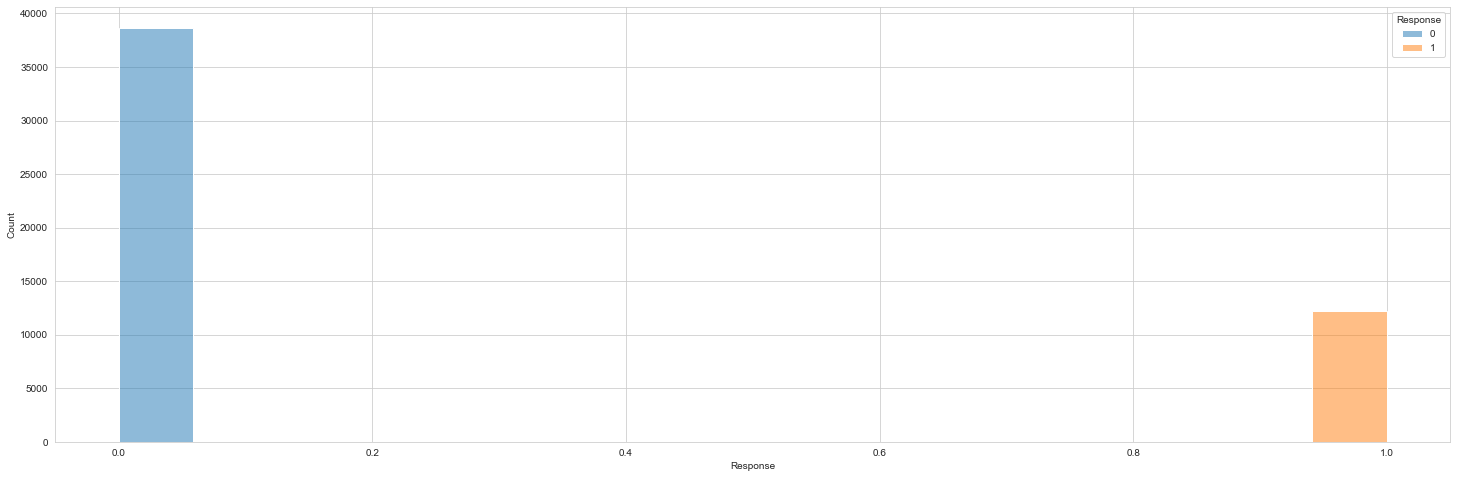

In [211]:
plt.figure(figsize=(25,8))
sns.histplot(data=train, x='Response',   hue='Response' , fill=True)
plt.show()

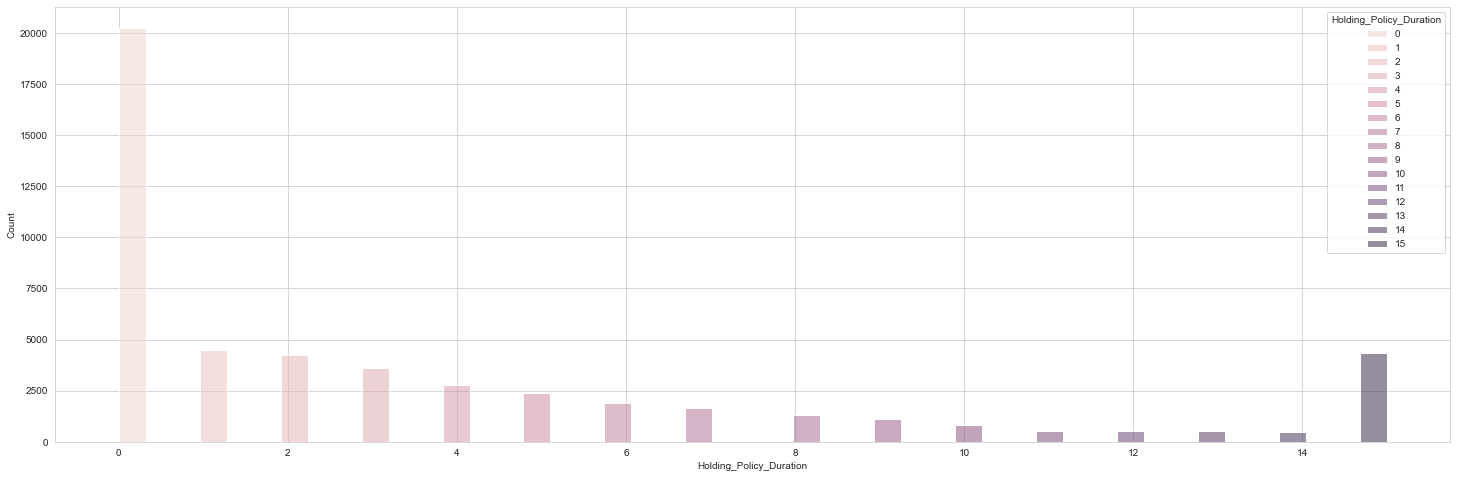

In [212]:
plt.figure(figsize=(25,8))
sns.histplot(data=train, x='Holding_Policy_Duration',   hue='Holding_Policy_Duration' , fill=True)
plt.show()

#### Holding_Policy_Duration  is also skewed, mostly policy in proposal state or  for non turn out cutsomer where customer didn't not purchase

In [213]:
train.describe()

,Region_Code,Accomodation_Type,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,0.549330,44.856275,42.738866,3.706379,15.115188,14183.950069,0.239947
std,1424.081652,0.497566,17.310271,17.319375,4.766053,6.340663,6590.074873,0.427055
min,1.000000,0.000000,18.000000,16.000000,0.000000,1.000000,2280.000000,0.000000
25%,523.000000,0.000000,28.000000,27.000000,0.000000,12.000000,9248.000000,0.000000
50%,1391.000000,1.000000,44.000000,40.000000,2.000000,17.000000,13178.000000,0.000000
75%,2667.000000,1.000000,59.000000,57.000000,6.000000,20.000000,18096.000000,0.000000
max,6194.000000,1.000000,75.000000,75.000000,15.000000,22.000000,43350.400000,1.000000


<AxesSubplot:xlabel='Reco_Policy_Cat'>

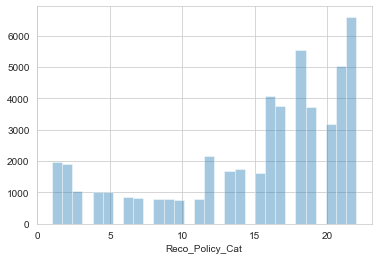

In [214]:
##sns.displot(train['Reco_Policy_Cat'] )

##plot = sns.distplot(train['Reco_Policy_Cat'],kde=False, bin =15)
##plt.show()

sns.set_style('whitegrid')
sns.distplot(train['Reco_Policy_Cat'], kde = False,  bins = 30)

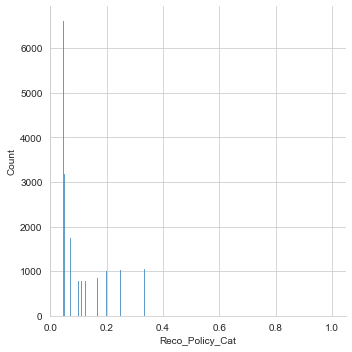

In [215]:
reci_pro=1/train['Reco_Policy_Cat']
sns.displot(reci_pro)

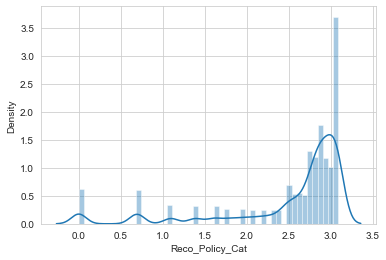

In [216]:
#  RECO policy type is skew type with log function
log_pol_cat = np.log(train['Reco_Policy_Cat'])
plot = sns.distplot(log_pol_cat,kde=True)
plt.show()

#### Understanding Response with other values 

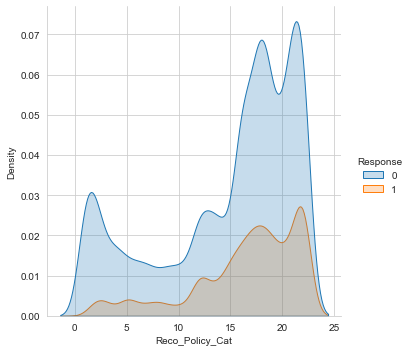

In [217]:
sns.displot(train, x="Reco_Policy_Cat", hue="Response", kind="kde", fill=True)

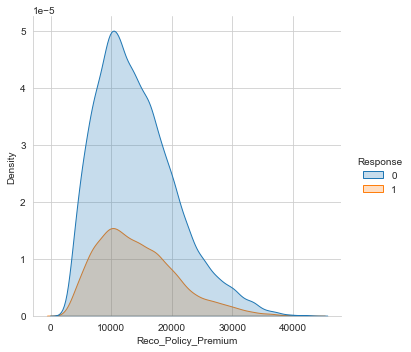

In [218]:
sns.displot(train, x="Reco_Policy_Premium", hue="Response", kind="kde", fill=True)

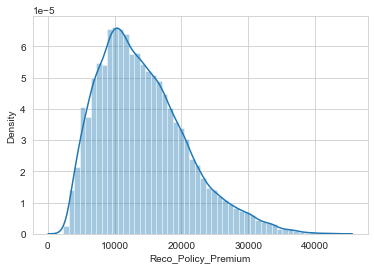

In [219]:
sns.distplot(train['Reco_Policy_Premium']);

In [220]:
train.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [221]:
#Categorical features
train.describe(include = ['object'])

,City_Code,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Type
count,50882,50882,50882,50882,50882
unique,36,2,2,10,5
top,C1,Individual,No,X1,0
freq,8973,40536,42460,13010,20251


In [222]:
train.Region_Code.nunique()

5316

In [223]:
train.City_Code.nunique()

36

In [224]:
train['Reco_Insurance_Type'].unique()

array(['Individual', 'Joint'], dtype=object)

In [225]:
train['Reco_Insurance_Type'].replace({'Individual':1, 'Joint':0}, inplace = True)
train['Reco_Insurance_Type'] = train.Reco_Insurance_Type.astype(int)

In [226]:
train['Health Indicator'].unique()

array(['X1', 'X2', 'X0', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [228]:
#Label Encoding Reco_Insurance_Type

from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()
a  = ['Is_Spouse']
for i in np.arange(len(a)):
    train[a[i]] = lm.fit_transform(train[a[i]])


In [229]:
train.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,0,1,36,36,0,X1,15,3.0,22,11628.0,0
1,C5,1117,1,0,75,22,0,X2,0,0,22,30510.0,0
2,C5,3732,1,1,32,32,0,X0,1,1.0,19,7450.0,1
3,C24,4378,1,0,52,48,0,X1,15,3.0,19,17780.0,0
4,C8,2190,0,1,44,44,0,X2,3,1.0,16,10404.0,0


In [230]:
train['Is_Spouse'].unique()

array([0, 1], dtype=int64)

In [231]:
train.drop_duplicates(keep="first", inplace=True)

In [232]:
train.shape

(50882, 13)

### Holding_Policy_Type

In [233]:
#There are only 4 categories(+ null values) of Holding POlicy Type
#First filling the null values with 0

train.Holding_Policy_Type.fillna(0, inplace = True)

In [234]:
train.Holding_Policy_Type.unique()

array(['3.0', '0', '1.0', '4.0', '2.0'], dtype=object)

In [235]:
train.Holding_Policy_Type.dtype

dtype('O')

In [236]:
#Converting the numerical values into 5 categorical values
train['Holding_Policy_Type'] = train.Holding_Policy_Type.astype(str)

#Categorical Unique Values of the Holding Type
train.Holding_Policy_Type.dtype

dtype('O')

### Holding_type_duration

In [237]:
#The duration is categorical because of the value 14+
#Replacing 14+ with 15 as it is the next higher number
train.Holding_Policy_Duration.replace(to_replace='14+', value='15', inplace = True)

#Fill the null values with 0
train.Holding_Policy_Duration.fillna(0, inplace = True)

#Duration should be numerical
train['Holding_Policy_Duration'] = train.Holding_Policy_Duration.astype(float)

In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  int32  
 3   Reco_Insurance_Type      50882 non-null  int32  
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  int64  
 7   Health Indicator         50882 non-null  object 
 8   Holding_Policy_Duration  50882 non-null  float64
 9   Holding_Policy_Type      50882 non-null  object 
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int32(2), int64(6), object(3)
memory usage: 5.0+ MB


In [240]:
train.Holding_Policy_Type.unique()

array(['3.0', '0', '1.0', '4.0', '2.0'], dtype=object)

### Encoding

In [241]:
#encoding Holding_Policy_Type

hold_dummies = pd.get_dummies(train.Holding_Policy_Type)
#merging the dummies with the dataframe
train = pd.concat([train,hold_dummies], axis = 'columns')
#dropping Holding_Policy_Type column and a dummy variable to avoid the dummy variable trap
train.drop(['Holding_Policy_Type','0'], axis = 'columns', inplace = True)


#### Health Indicator


In [243]:
train['Health Indicator'].unique()

array(['X1', 'X2', 'X0', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [244]:
#encoding Health Indicator

health_dummies = pd.get_dummies(train['Health Indicator'])
#merging the dummies with the dataframe
train = pd.concat([train,health_dummies], axis = 'columns')
#dropping Health Indicator column and a dummy variable to avoid the dummy variable trap
train.drop(['Health Indicator','X0'], axis = 'columns', inplace = True)


#### City_Code

In [245]:
#encoding City_Code

city_dummies = pd.get_dummies(train['City_Code'])
#merging the dummies with the dataframe
train = pd.concat([train,city_dummies], axis = 'columns')
#dropping City_Code column and a dummy variable to avoid the dummy variable trap
train.drop(['City_Code','C31'], axis = 'columns', inplace = True)


### Scaling

In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Apply Standardscaler for Reco_Policy_Premium
ss = StandardScaler()
train['Reco_Policy_Premium']= ss.fit_transform(train[['Reco_Policy_Premium']])

In [247]:
train.describe()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,5.088200e+04,50882.000000,...,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,0.549330,0.796667,44.856275,42.738866,0.165520,3.706379,15.115188,-2.002087e-16,0.239947,...,0.005621,0.002555,0.001101,0.000708,0.072147,0.026807,0.038324,0.037538,0.035494,0.042942
std,1424.081652,0.497566,0.402482,17.310271,17.319375,0.371653,4.766053,6.340663,1.000010e+00,0.427055,...,0.074762,0.050482,0.033157,0.026590,0.258734,0.161521,0.191979,0.190077,0.185026,0.202729
min,1.000000,0.000000,0.000000,18.000000,16.000000,0.000000,0.000000,1.000000,-1.806363e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,523.000000,0.000000,1.000000,28.000000,27.000000,0.000000,0.000000,12.000000,-7.490049e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1391.000000,1.000000,1.000000,44.000000,40.000000,0.000000,2.000000,17.000000,-1.526477e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2667.000000,1.000000,1.000000,59.000000,57.000000,0.000000,6.000000,20.000000,5.936334e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6194.000000,1.000000,1.000000,75.000000,75.000000,1.000000,15.000000,22.000000,4.425858e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [248]:
#Apply Standardscaler for Reco_Policy_Premium
ss = StandardScaler()
train['Region_Code']= ss.fit_transform(train[['Region_Code']])

In [249]:
train['Upper_Age']= ss.fit_transform(train[['Upper_Age']])
train['Lower_Age']= ss.fit_transform(train[['Lower_Age']])

In [250]:
train['Reco_Policy_Cat']= ss.fit_transform(train[['Reco_Policy_Cat']])

In [251]:
train.describe()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
count,5.088200e+04,50882.000000,50882.000000,5.088200e+04,5.088200e+04,50882.000000,50882.000000,5.088200e+04,5.088200e+04,50882.000000,...,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,4.473010e-17,0.549330,0.796667,5.268334e-16,9.800911e-17,0.165520,3.706379,-6.770283e-17,-2.002087e-16,0.239947,...,0.005621,0.002555,0.001101,0.000708,0.072147,0.026807,0.038324,0.037538,0.035494,0.042942
std,1.000010e+00,0.497566,0.402482,1.000010e+00,1.000010e+00,0.371653,4.766053,1.000010e+00,1.000010e+00,0.427055,...,0.074762,0.050482,0.033157,0.026590,0.258734,0.161521,0.191979,0.190077,0.185026,0.202729
min,-1.216086e+00,0.000000,0.000000,-1.551480e+00,-1.543885e+00,0.000000,0.000000,-2.226160e+00,-1.806363e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.495304e-01,0.000000,1.000000,-9.737826e-01,-9.087522e-01,0.000000,0.000000,-4.913081e-01,-7.490049e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.400088e-01,1.000000,1.000000,-4.946680e-02,-1.581404e-01,0.000000,2.000000,2.972608e-01,-1.526477e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.560161e-01,1.000000,1.000000,8.170793e-01,8.234289e-01,0.000000,6.000000,7.704021e-01,5.936334e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.132724e+00,1.000000,1.000000,1.741395e+00,1.862738e+00,1.000000,15.000000,1.085830e+00,4.425858e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection

In [252]:
# Threshold for removing correlated variables
threshold = 0.7

# Absolute value correlation matrix
corr_matrix = train.corr().abs()
corr_matrix.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
Region_Code,1.000000,0.009105,0.004275,0.005649,0.005928,0.002567,0.013193,0.065120,0.010797,0.001121,...,0.028027,0.043330,0.036216,0.016993,0.027106,0.016769,0.037726,0.027700,0.082094,0.015979
Accomodation_Type,0.009105,1.000000,0.196833,0.419129,0.369400,0.191045,0.224995,0.022055,0.350514,0.005201,...,0.023833,0.018319,0.000908,0.003304,0.012761,0.052159,0.033577,0.061050,0.032255,0.022657
Reco_Insurance_Type,0.004275,0.196833,1.000000,0.227119,0.014998,0.881560,0.105313,0.020826,0.596160,0.009891,...,0.000100,0.001386,0.006460,0.001249,0.045944,0.017942,0.026326,0.041010,0.001114,0.023432
Upper_Age,0.005649,0.419129,0.227119,1.000000,0.921392,0.202947,0.377372,0.025257,0.792689,0.002772,...,0.017600,0.018000,0.007908,0.001743,0.051300,0.038035,0.042651,0.009865,0.028555,0.050421
Lower_Age,0.005928,0.369400,0.014998,0.921392,1.000000,0.062634,0.340451,0.021163,0.615739,0.002099,...,0.016049,0.018007,0.005318,0.000964,0.040124,0.037965,0.037173,0.008383,0.026191,0.042840


In [253]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

upper.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
Region_Code,NaN,0.009105,0.004275,0.005649,0.005928,0.002567,0.013193,0.065120,0.010797,0.001121,...,0.028027,0.043330,0.036216,0.016993,0.027106,0.016769,0.037726,0.027700,0.082094,0.015979
Accomodation_Type,NaN,NaN,0.196833,0.419129,0.369400,0.191045,0.224995,0.022055,0.350514,0.005201,...,0.023833,0.018319,0.000908,0.003304,0.012761,0.052159,0.033577,0.061050,0.032255,0.022657
Reco_Insurance_Type,NaN,NaN,NaN,0.227119,0.014998,0.881560,0.105313,0.020826,0.596160,0.009891,...,0.000100,0.001386,0.006460,0.001249,0.045944,0.017942,0.026326,0.041010,0.001114,0.023432
Upper_Age,NaN,NaN,NaN,NaN,0.921392,0.202947,0.377372,0.025257,0.792689,0.002772,...,0.017600,0.018000,0.007908,0.001743,0.051300,0.038035,0.042651,0.009865,0.028555,0.050421
Lower_Age,NaN,NaN,NaN,NaN,NaN,0.062634,0.340451,0.021163,0.615739,0.002099,...,0.016049,0.018007,0.005318,0.000964,0.040124,0.037965,0.037173,0.008383,0.026191,0.042840


In [254]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 3 columns to remove.


In [255]:
to_drop

['Lower_Age', 'Is_Spouse', 'Reco_Policy_Premium']

In [256]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 0 to 50881
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region_Code              50882 non-null  float64
 1   Accomodation_Type        50882 non-null  int32  
 2   Reco_Insurance_Type      50882 non-null  int32  
 3   Upper_Age                50882 non-null  float64
 4   Lower_Age                50882 non-null  float64
 5   Is_Spouse                50882 non-null  int64  
 6   Holding_Policy_Duration  50882 non-null  float64
 7   Reco_Policy_Cat          50882 non-null  float64
 8   Reco_Policy_Premium      50882 non-null  float64
 9   Response                 50882 non-null  int64  
 10  1.0                      50882 non-null  uint8  
 11  2.0                      50882 non-null  uint8  
 12  3.0                      50882 non-null  uint8  
 13  4.0                      50882 non-null  uint8  
 14  X1                    

In [257]:
train_selected = train.drop(columns = to_drop)

## Model Building

In [258]:
from collections import Counter
x = train.drop('Response', axis = 1)
y = train.Response
print(Counter(y))

Counter({0: 38673, 1: 12209})


In [ ]:
x.head()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# instantiating the random over sampler

# resampling X, y

# new class distribution


In [259]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

# new class distribution
from collections import Counter
print(Counter(y_smote))

Counter({0: 38673, 1: 38673})


In [260]:
#Hold-out method
#Splitting the dataset into train data and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [ ]:
#ROS SPLIT


### Decision Tree

In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [263]:
model= DecisionTreeClassifier(random_state =6)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=6)

In [264]:
prediction = model.predict(X_test)

In [265]:
from sklearn.metrics import roc_auc_score

In [266]:
#DecisionTree Classifier
roc_auc_score(y_test,prediction)

0.5486528791360221

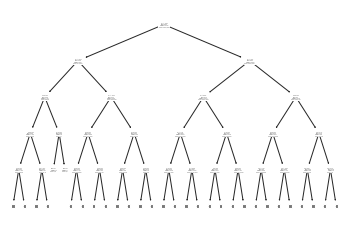

In [267]:
tree.plot_tree(model, max_depth =4)
 
plt.show()

#### Feature Scaling Model

In [268]:
from collections import Counter
x_selected = train_selected.drop('Response', axis = 1)
y_selected = train_selected.Response
print(Counter(y))

Counter({0: 38673, 1: 12209})


In [269]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_selected, y_selected)

# new class distribution
from collections import Counter
print(Counter(y_smote))

Counter({0: 38673, 1: 38673})


In [270]:
#Hold-out method
#Splitting the dataset into train data and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.2, random_state=10)

In [271]:
model= DecisionTreeClassifier(random_state =6)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=6)

In [272]:
prediction = model.predict(X_test)

In [273]:
#DecisionTree Classifier
roc_auc_score(y_test,prediction)

0.7655867123107069

#### With  removal of irrevalent data score improved significantly

#### Random Forest classifier 

In [276]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [277]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.8151399326250324

 #### XTREE

In [279]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)
roc_auc_score(y_test, y_pred)

0.796752465187327

#### Here Random forest gave highest score

In [280]:
from sklearn.neighbors import KNeighborsClassifier

In [281]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10) 

In [282]:
# Train the classifier
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6661714129194456

#### Experiments with KNN is not satisfactory